In [1]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA version:", torch.version.cuda)
    print("GPU:", torch.cuda.get_device_name(0))


Torch version: 2.5.1+cu118
CUDA available: True
CUDA version: 11.8
GPU: NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
import os
from ultralytics import YOLO

In [3]:
BASE_PATH = "D:/hackathon/Webpage elements"
TRAIN_IMAGES_PATH = os.path.join(BASE_PATH, "train/images")
TRAIN_LABELS_PATH = os.path.join(BASE_PATH, "train/labels")
TEST_IMAGES_PATH = os.path.join(BASE_PATH, "test/images")
VALID_IMAGES_PATH = os.path.join(BASE_PATH, "valid/images")

In [4]:
train_images = sorted(os.listdir(TRAIN_IMAGES_PATH))
train_labels = sorted(os.listdir(TRAIN_LABELS_PATH))

missing_labels = [img for img in train_images if img.replace(".jpg", ".txt") not in train_labels]
if missing_labels:
    print(f"Missing labels for: {missing_labels}")
else:
    print("All images have corresponding labels.")

All images have corresponding labels.


In [5]:
yaml_content = f"""
path: {BASE_PATH}
train: train/images
val: valid/images
test: test/images

names:
  0: header
  1: navbar
  2: button
  3: text_area
  4: footer
  5: image
  6: link
  7: text
"""

yaml_path = os.path.join(BASE_PATH, "data.yaml")
with open(yaml_path, "w") as f:
    f.write(yaml_content)
print(f"data.yaml created at {yaml_path}")

data.yaml created at D:/hackathon/Webpage elements\data.yaml


In [7]:
try:
    model = YOLO('yolov5s.pt')  # Load YOLOv5 small model
    results = model.train(
        data=yaml_path,
        epochs=30,
        imgsz=640,
        batch=16,
        device=0,  # Ensure GPU is used
        name="webpage_elements_detection"
    )
    print("Training completed successfully!")
except Exception as e:
    print(f"An error occurred during training: {e}")

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.57  Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov5s.pt, data=D:/hackathon/Webpage elements\data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=webpage_elements_detection9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det

train: Scanning D:\hackathon\Webpage elements\train\labels.cache... 1688 images, 0 backgrounds, 0 corrupt: 100%|███████

train: WARNING  D:\hackathon\Webpage elements\train\images\9to5mac_com_png.rf.NcF4DV5kC6mqzV9v1jIZ.jpg: 1 duplicate labels removed
train: WARNING  D:\hackathon\Webpage elements\train\images\9to5mac_com_png.rf.b280c437f46781de696d7057495c4bf9.jpg: 1 duplicate labels removed
train: WARNING  D:\hackathon\Webpage elements\train\images\aka_ms_png.rf.8e0bfbf8e04642c2d5d2e0882fc16785.jpg: 1 duplicate labels removed
train: WARNING  D:\hackathon\Webpage elements\train\images\aka_ms_png.rf.PG05f68F5wIfdDnoZRhT.jpg: 1 duplicate labels removed
train: WARNING  D:\hackathon\Webpage elements\train\images\artstation_com_png.rf.00e9b1b2a87351418ec7b46deb925259.jpg: 1 duplicate labels removed
train: WARNING  D:\hackathon\Webpage elements\train\images\artstation_com_png.rf.NjQJluMUiA8ypgE0HBVu.jpg: 1 duplicate labels removed
train: WARNING  D:\hackathon\Webpage elements\train\images\bangordailynews_com_png.rf.71a2026d028805acb494f816f0d77c2f.jpg: 2 duplicate labels removed
train: WARNING  D:\hackathon\We


val: Scanning D:\hackathon\Webpage elements\valid\labels.cache... 482 images, 0 backgrounds, 0 corrupt: 100%|██████████

val: WARNING  D:\hackathon\Webpage elements\valid\images\bandsintown_com_png.rf.I19VlDFncZ0RifJhmfEU.jpg: 4 duplicate labels removed
val: WARNING  D:\hackathon\Webpage elements\valid\images\bandsintown_com_png.rf.b8462344187a5cdffe24d70019fabd0a.jpg: 4 duplicate labels removed
val: WARNING  D:\hackathon\Webpage elements\valid\images\deondernemer_nl_png.rf.c00a7c65fab4356b887dea5c9e96e8f3.jpg: 1 duplicate labels removed
val: WARNING  D:\hackathon\Webpage elements\valid\images\deondernemer_nl_png.rf.mVLu7hIaZ8VUCwbhSF6c.jpg: 1 duplicate labels removed
val: WARNING  D:\hackathon\Webpage elements\valid\images\flickr_com_png.rf.27963e0183770e78d58a8b78dc41715e.jpg: 2 duplicate labels removed
val: WARNING  D:\hackathon\Webpage elements\valid\images\flickr_com_png.rf.IKOHXY9vM9t5eOz75BGX.jpg: 2 duplicate labels removed
val: WARNING  D:\hackathon\Webpage elements\valid\images\foxnews_com_png.rf.10605c226e8ff71fd5510b806e5584b5.jpg: 2 duplicate labels removed
val: WARNING  D:\hackathon\Webpage 

Plotting labels to runs\detect\webpage_elements_detection9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\webpage_elements_detection9
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.74G       1.87      2.506      1.451        566        640: 100%|██████████| 106/106 [02:40<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24


                   all        482      20888      0.364      0.262      0.195      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.07G      1.564      1.924      1.309        469        640: 100%|██████████| 106/106 [02:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:56


                   all        482      20888      0.406      0.316      0.237      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.92G      1.502      1.849       1.27        575        640: 100%|██████████| 106/106 [02:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20

                   all        482      20888      0.405      0.302      0.244      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.28G      1.462      1.795      1.253        567        640: 100%|██████████| 106/106 [02:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23

                   all        482      20888      0.441      0.327       0.28      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.77G      1.418      1.748      1.238        649        640: 100%|██████████| 106/106 [02:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24

                   all        482      20888      0.449      0.334      0.281      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.94G      1.388      1.711      1.221        595        640: 100%|██████████| 106/106 [02:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:19

                   all        482      20888      0.452      0.314      0.268      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.48G      1.356      1.662      1.207        503        640: 100%|██████████| 106/106 [02:37<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23

                   all        482      20888      0.455      0.317      0.278      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.02G      1.343      1.649      1.199        718        640: 100%|██████████| 106/106 [02:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23

                   all        482      20888      0.443      0.368      0.324      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.29G      1.316      1.621      1.188        455        640: 100%|██████████| 106/106 [02:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20

                   all        482      20888      0.458      0.342      0.301      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.74G      1.299      1.592      1.183        501        640: 100%|██████████| 106/106 [02:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:19

                   all        482      20888      0.484      0.341      0.333      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.58G      1.292      1.579      1.178        407        640: 100%|██████████| 106/106 [02:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:21

                   all        482      20888      0.372      0.367      0.329      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.89G      1.269      1.535      1.165        553        640: 100%|██████████| 106/106 [02:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20

                   all        482      20888      0.416      0.416      0.351      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.73G       1.25      1.516      1.153        488        640: 100%|██████████| 106/106 [02:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20

                   all        482      20888      0.452       0.39      0.343      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.68G      1.235      1.491      1.155        649        640: 100%|██████████| 106/106 [02:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20

                   all        482      20888      0.458      0.404      0.355      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.12G      1.227      1.476      1.152        663        640: 100%|██████████| 106/106 [02:42<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:21

                   all        482      20888      0.449       0.39      0.364      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.44G      1.208      1.449      1.139        296        640: 100%|██████████| 106/106 [02:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24

                   all        482      20888      0.442      0.391      0.368      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.36G      1.199       1.42      1.134       1043        640: 100%|██████████| 106/106 [02:32<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22

                   all        482      20888      0.396      0.397      0.352       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.33G       1.18      1.401      1.126        651        640: 100%|██████████| 106/106 [02:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22

                   all        482      20888      0.505      0.391      0.381       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.85G      1.176      1.378      1.126        590        640: 100%|██████████| 106/106 [02:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20

                   all        482      20888      0.476      0.377      0.372      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.67G      1.154      1.346      1.114        440        640: 100%|██████████| 106/106 [02:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22

                   all        482      20888      0.421      0.395      0.348      0.242


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.31G      1.144      1.333      1.114        405        640: 100%|██████████| 106/106 [02:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22

                   all        482      20888      0.438      0.407      0.356      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.54G      1.134       1.29      1.108        288        640: 100%|██████████| 106/106 [01:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22

                   all        482      20888      0.484      0.411      0.372      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.38G      1.119      1.257      1.101        339        640: 100%|██████████| 106/106 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:21

                   all        482      20888       0.51      0.372      0.374      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.99G      1.101      1.221      1.092        392        640: 100%|██████████| 106/106 [02:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22

                   all        482      20888      0.435       0.39      0.362      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.55G       1.08       1.18      1.085        306        640: 100%|██████████| 106/106 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:21

                   all        482      20888      0.495      0.406      0.382      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.71G      1.072      1.152       1.08        239        640: 100%|██████████| 106/106 [01:31<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20

                   all        482      20888      0.461      0.406      0.371      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.28G      1.052      1.118      1.071        306        640: 100%|██████████| 106/106 [06:30<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:39

                   all        482      20888      0.479      0.374      0.381      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.27G      1.033      1.097      1.067        371        640: 100%|██████████| 106/106 [01:15<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:19

                   all        482      20888      0.474      0.392      0.385      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.85G       1.03      1.076      1.063        531        640: 100%|██████████| 106/106 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:21

                   all        482      20888      0.426      0.412      0.386      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.69G      1.016      1.054      1.054        314        640: 100%|██████████| 106/106 [07:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:38

                   all        482      20888      0.443      0.425      0.389      0.276



30 epochs completed in 1.500 hours.
Optimizer stripped from runs\detect\webpage_elements_detection9\weights\last.pt, 18.5MB
Optimizer stripped from runs\detect\webpage_elements_detection9\weights\best.pt, 18.5MB

Validating runs\detect\webpage_elements_detection9\weights\best.pt...
Ultralytics 8.3.57  Python-3.11.11 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv5s summary (fused): 193 layers, 9,114,632 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12


                   all        482      20888      0.443      0.425      0.389      0.276
                header        454       6354      0.503      0.454      0.435      0.294
                navbar        242        366      0.555      0.628      0.604      0.489
                button        428       1508       0.36      0.481       0.39       0.26
             text_area        102        158      0.348      0.392      0.281      0.212
                footer        468       3766      0.529      0.482      0.471      0.332
                 image         20         34      0.424      0.235      0.272        0.2
                  link        380       2654      0.443      0.359      0.352      0.243
                  text        468       6048      0.381      0.369      0.309      0.175
Speed: 0.3ms preprocess, 4.6ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs\detect\webpage_elements_detection9
Training completed successfully!



image 1/1 D:\hackathon\Webpage elements\test\images\addons_mozilla_org_png.rf.ec9a8e78cd5c0e6ab255f50c408caecf.jpg: 480x640 8 headers, 1 navbar, 3 buttons, 6 footers, 2 links, 13 texts, 45.6ms
Speed: 3.1ms preprocess, 45.6ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


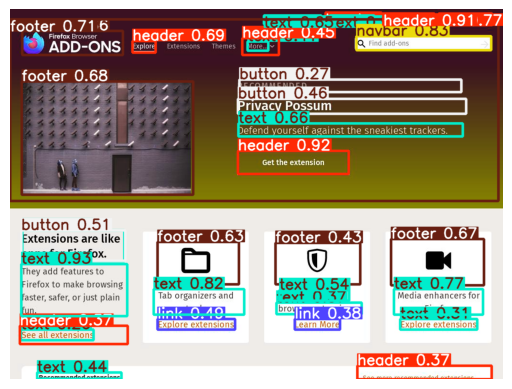

In [13]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
# Load the trained YOLO model
model_path = r"C:\Users\srive\Downloads\best (1).pt"
model = YOLO(model_path)

# Path to the test image
test_image_path = r"D:\hackathon\Webpage elements\test\images\addons_mozilla_org_png.rf.ec9a8e78cd5c0e6ab255f50c408caecf.jpg"

# Perform inference
results = model(test_image_path)

# Visualize the results
results_image = results[0].plot()  # Annotated image
plt.imshow(results_image)
plt.axis("off")
plt.show()



image 1/1 C:\Users\srive\OneDrive\Desktop\testamazon.png: 320x640 30 headers, 2 navbars, 6 buttons, 13 footers, 2 links, 10 texts, 75.1ms
Speed: 2.0ms preprocess, 75.1ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 640)


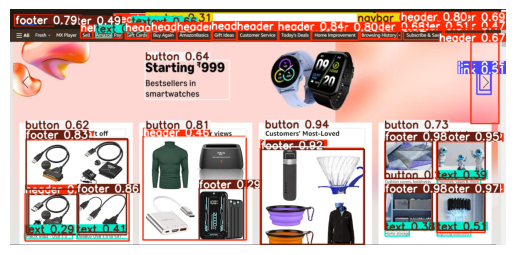

In [14]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
# Load the trained YOLO model
model_path = r"C:\Users\srive\Downloads\best (1).pt"
model = YOLO(model_path)

# Path to the test image
test_image_path = r"C:\Users\srive\OneDrive\Desktop\testamazon.png"

# Perform inference
results = model(test_image_path)

# Visualize the results
results_image = results[0].plot()  # Annotated image
plt.imshow(results_image)
plt.axis("off")
plt.show()
